## BUSINESS PROBLEM

ShopSmart Inc. is an e-commerce platform that sells a variety of products online. The company aims to optimize its website and enhance customer satisfaction by understanding customer behavior and preferences. To achieve this goal, ShopSmart Inc. plans to analyze the data collected from its website to gain insights into customer interactions, purchasing patterns, and product preferences.

Project Objective: The objective of this project is to utilize data from ShopSmart Inc.'s website to understand customer behavior and preferences. By analyzing the data, the company aims to:
1.     Segment customers based on their preferences, geographic location, and purchasing behavior.
2.     Enhance website usability and user experience based on insights gained from customer interactions.
3.     Optimize product offerings and marketing strategies to improve customer satisfaction and retention.

Data Sources:
The data for this project will be sourced from ShopSmart Inc.'s website and will include various attributes such as customer IDs, device IDs, transaction details, product information, and timestamps of customer interactions.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
events = pd.read_csv("events.csv")
events.shape

(147208, 4)

In [3]:
customer = pd.read_csv("customers.csv")

customer.shape

(10000, 4)

In [4]:
order = pd.read_csv("orders.csv")

order.shape

(9165, 4)

In [5]:
# merging the first three dataset

result = pd.merge(events, customer, on='customer_id', how='outer')
result = pd.merge(result, order, on='customer_id', how='outer')

result.head()

,event_id,customer_id,event_data,event_timestamp,device_id,location,currency,order_id,status,checked_out_at
0,14753,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,"{""timestamp"": ""2024-03-21T12:47:11.012084"", ""e...",2024-03-21 12:47:11.012084,ef424b22-2393-4708-b065-c68152e8b377,Oman,USD,5e57de16-d33c-4126-bf0b-da65449cc3d1,cancelled,2024-03-30 04:12:10.394413
1,14754,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,"{""timestamp"": ""2024-03-27T11:35:50.208930"", ""e...",2024-03-27 11:35:50.208930,ef424b22-2393-4708-b065-c68152e8b377,Oman,USD,5e57de16-d33c-4126-bf0b-da65449cc3d1,cancelled,2024-03-30 04:12:10.394413
2,14755,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,"{""timestamp"": ""2024-03-30T04:03:10.392205"", ""e...",2024-03-30 04:03:10.392205,ef424b22-2393-4708-b065-c68152e8b377,Oman,USD,5e57de16-d33c-4126-bf0b-da65449cc3d1,cancelled,2024-03-30 04:12:10.394413
3,14756,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,"{""item_id"": 12, ""quantity"": 5, ""timestamp"": ""2...",2024-03-30 04:03:10.394393,ef424b22-2393-4708-b065-c68152e8b377,Oman,USD,5e57de16-d33c-4126-bf0b-da65449cc3d1,cancelled,2024-03-30 04:12:10.394413
4,14757,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,"{""item_id"": 11, ""quantity"": 1, ""timestamp"": ""2...",2024-03-30 04:03:10.394398,ef424b22-2393-4708-b065-c68152e8b377,Oman,USD,5e57de16-d33c-4126-bf0b-da65449cc3d1,cancelled,2024-03-30 04:12:10.394413


In [6]:
# importing the 4th dataset

product = pd.read_csv("products.csv")

In [7]:
# importing the 5th dataset
line_item = pd.read_csv("line_items.csv")

In [8]:
# merging the 4th and the 5th datasets

inner_merged = pd.merge(product, line_item, left_on='id', right_on='item_id', how='outer')

In [9]:
# merging the two dataframes that was merged before

final_data = pd.merge(result, inner_merged, on='order_id', how='inner')
final_data.head()

,event_id,customer_id,event_data,event_timestamp,device_id,location,currency,order_id,status,checked_out_at,id,name,price,line_item_id,item_id,quantity
0,14786,cda7bec0-7cbf-4145-baf9-e049bab94504,"{""timestamp"": ""2024-03-26T22:05:58.863661"", ""e...",2024-03-26 22:05:58.863661,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,NGN,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,4,Microsoft Xbox Series X,499.99,3201,4,2
1,14786,cda7bec0-7cbf-4145-baf9-e049bab94504,"{""timestamp"": ""2024-03-26T22:05:58.863661"", ""e...",2024-03-26 22:05:58.863661,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,NGN,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,5,Nike Air Max 270,129.99,3202,5,4
2,14786,cda7bec0-7cbf-4145-baf9-e049bab94504,"{""timestamp"": ""2024-03-26T22:05:58.863661"", ""e...",2024-03-26 22:05:58.863661,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,NGN,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,6,Adidas Ultraboost,180.00,3205,6,2
3,14786,cda7bec0-7cbf-4145-baf9-e049bab94504,"{""timestamp"": ""2024-03-26T22:05:58.863661"", ""e...",2024-03-26 22:05:58.863661,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,NGN,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,9,Nintendo Switch,299.99,3203,9,5
4,14786,cda7bec0-7cbf-4145-baf9-e049bab94504,"{""timestamp"": ""2024-03-26T22:05:58.863661"", ""e...",2024-03-26 22:05:58.863661,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,NGN,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,11,Canon EOS R5 Camera,3999.99,3206,11,4


In [10]:
final_data.shape

(578320, 16)

In [11]:
# drop redundant column ID

final_data.drop(columns = 'id', inplace=True)

In [12]:
final_data.shape

(578320, 15)

#### After merging the datasets and dropping the id column, the final data has about 15 columns and 578,320 rows 

In [13]:
final_data.duplicated().sum() # checking for duplicate in our dataset. There is no duplicate.

0

In [14]:
final_data.isna().sum() # Checking for missing values. There is none

event_id           0
customer_id        0
event_data         0
event_timestamp    0
device_id          0
location           0
currency           0
order_id           0
status             0
checked_out_at     0
name               0
price              0
line_item_id       0
item_id            0
quantity           0
dtype: int64

In [15]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 578320 entries, 0 to 578319
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   event_id         578320 non-null  int64  
 1   customer_id      578320 non-null  object 
 2   event_data       578320 non-null  object 
 3   event_timestamp  578320 non-null  object 
 4   device_id        578320 non-null  object 
 5   location         578320 non-null  object 
 6   currency         578320 non-null  object 
 7   order_id         578320 non-null  object 
 8   status           578320 non-null  object 
 9   checked_out_at   578320 non-null  object 
 10  name             578320 non-null  object 
 11  price            578320 non-null  float64
 12  line_item_id     578320 non-null  int64  
 13  item_id          578320 non-null  int64  
 14  quantity         578320 non-null  int64  
dtypes: float64(1), int64(4), object(10)
memory usage: 66.2+ MB


In [16]:
# Shortening the customer id to only contain the last unique numbers representing each customer. 

final_data['customer_id'] = [id.split("-")[-1] for id in final_data['customer_id']]  # Split each ID using "-" and extract the last item

In [17]:
# Splitting the event data column, replacing unwanted strings and then generating a new feature called event_type

final_data['event_type'] = [id.split(",")[-1] for id in final_data['event_data']]  # Split each ID using "-" and extract the last item

In [18]:
final_data['event_type'] = [id.split(":")[-1] for id in final_data['event_type']]

In [19]:
final_data['event_type'] = final_data['event_type'].str.replace('"', '').str.replace('}', '')


In [20]:
# converting to a date time series

final_data['event_timestamp'] = pd.to_datetime(final_data['event_timestamp'])

final_data['checked_out_at'] = pd.to_datetime(final_data['checked_out_at'])

In [21]:
# Generating a new feature called total_amount by mutiplying the price column and quantity

final_data['total_amount'] = final_data['price'] * final_data['quantity']

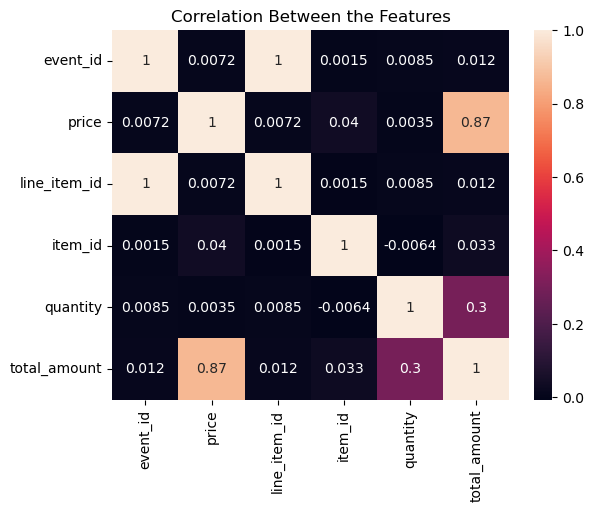

In [19]:
numerical_columns = final_data.select_dtypes(include= 'number')

sns.heatmap(numerical_columns.corr(), annot= True)


plt.title("Correlation Between the Features")
plt.show()

There is no correlation between the numerical columns

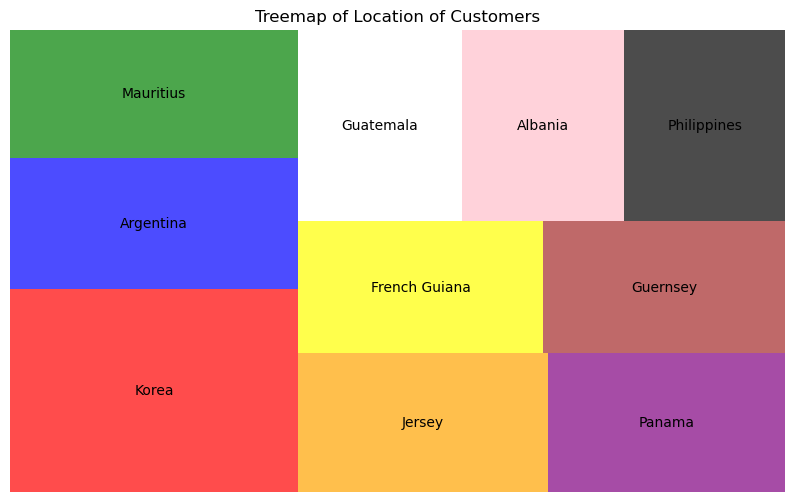

In [20]:
count = final_data['location'].value_counts().sort_values(ascending= False).head(10)
category = final_data['location'].value_counts().sort_values(ascending =False).head(10).index

import squarify

colors = ['red', 'blue', 'green', 'orange', 'purple', 'yellow', 'brown', 'white', 'pink', 'black']

# Plotting the treemap
plt.figure(figsize=(10, 6))
squarify.plot(sizes= count, label= category, alpha=0.7, color= colors)
plt.axis('off')  # Turn off axis
plt.title('Treemap of Location of Customers')
plt.show()


The treemap shows the top ten location with the highest customer base. ShopSmart Inc. has more customers in Korea with a count of 6,997 customers.

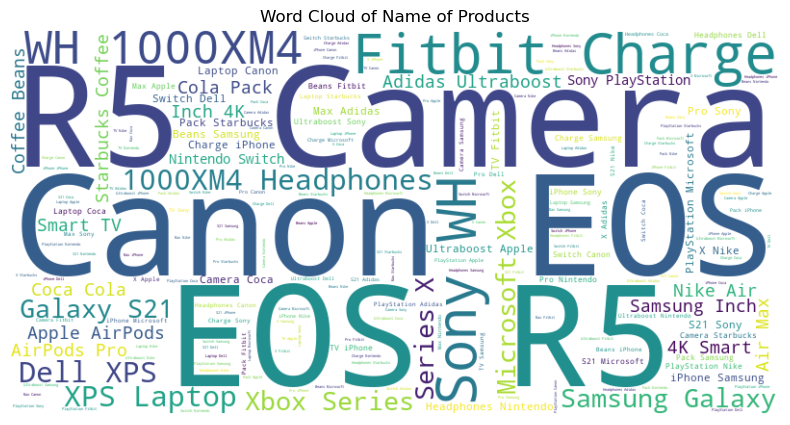

<Figure size 640x480 with 0 Axes>

In [22]:
from wordcloud import WordCloud

# Combine all words into a single string
text = ' '.join(final_data["name"])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Name of Products')
plt.show()
plt.savefig('product_count.png')



Canon EOS R5 Camera is the most purchased item followed by fitbit Charge 4, Sony WH-1000XM4 Headphones, Dell XPS 13 Laptop, and Samsung Galaxy S21

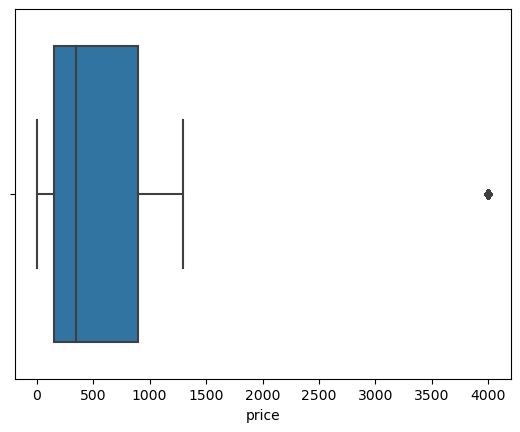

In [22]:
sns.boxplot(data = final_data, x = 'price') # checking for ouliers in the price column of our dataset. We have just few outlier

plt.show()

The boxplot shows that we have outliers in the price column in our dataset

In [23]:
# resolving the issue of outlier. The outliers was identified and and replaced with null values

Q3 = final_data['price'].quantile(0.75)
Q1 = final_data['price'].quantile(0.25)

IQR = Q3 - Q1

upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

outlier_mask = (final_data['price'] > upper_limit) | (final_data['price'] < lower_limit)

final_data['price'] = np.where(outlier_mask, np.nan, final_data['price'])


In [24]:
final_data['price'] = final_data['price'].fillna(final_data['price'].median()) # The nullvalues were filled with the median

In [25]:
final_data['price'].isna().sum()


0

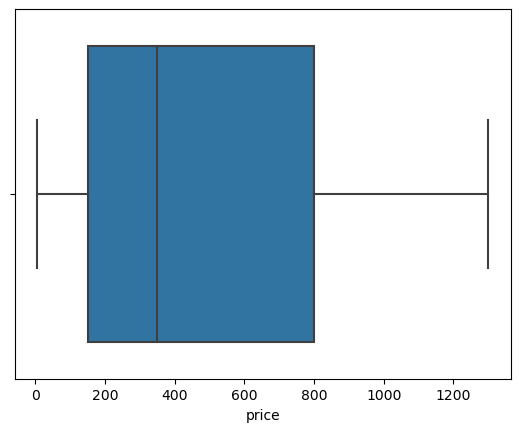

In [26]:
sns.boxplot(data = final_data, x = 'price')

plt.show()

From the boxplot above, we no longer have outliers in the price dataset

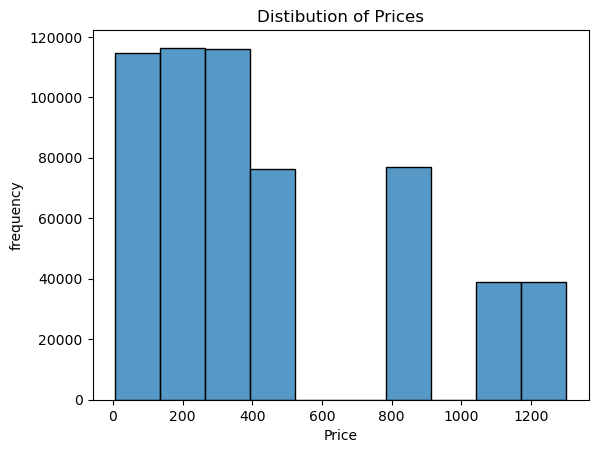

In [27]:

sns.histplot(data = final_data, x = final_data['price'], bins= 10)


plt.title("Distibution of Prices")
plt.xlabel("Price")
plt.ylabel("frequency")
plt.show()

The price is not normally distributed

## a. How often does this customer visit the website, based on the provided data?

In [29]:
visit_frequency = final_data.groupby('customer_id')['event_timestamp'].nunique().sort_values(ascending = False).head(20)

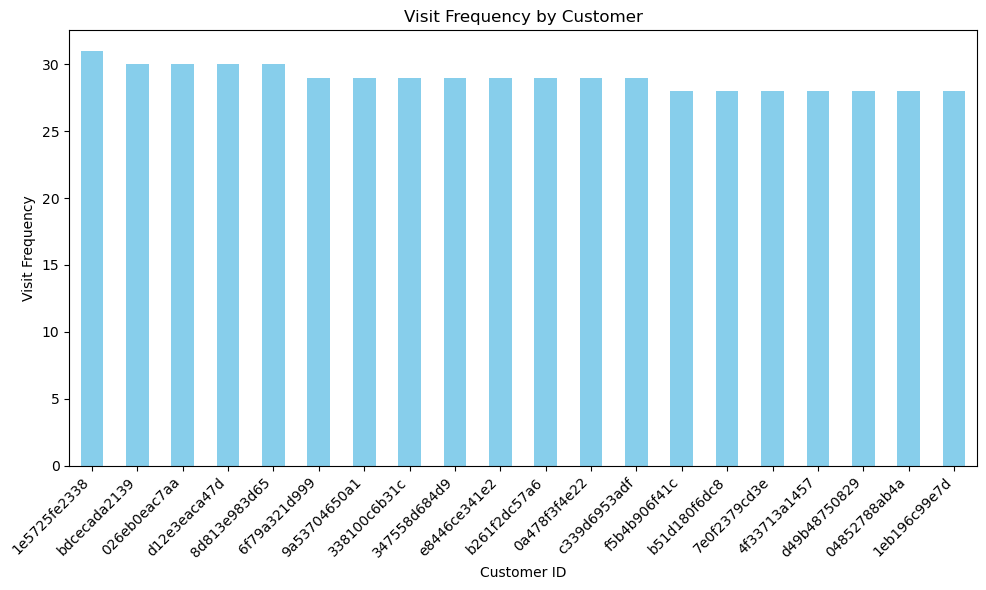

In [30]:
plt.figure(figsize=(10, 6))
visit_frequency.plot(kind='bar', color='skyblue')
plt.xlabel('Customer ID')
plt.ylabel('Visit Frequency')
plt.title('Visit Frequency by Customer')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


#### This shows the visit frequency of the top 20 customers with the highest count. The highest frequency came from a customer that visisted the website 30 times

## b. What is the customer's location based on the provided data?

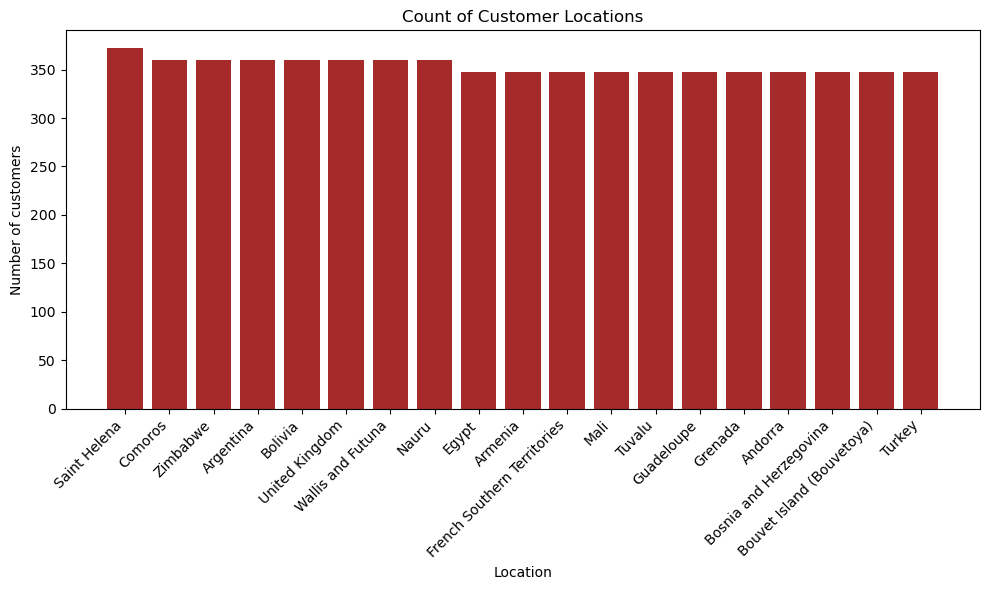

In [31]:
customer_location_count = final_data.groupby(['customer_id', 'location'])['location'].count().reset_index(name='count' )

# Sort by count in descending order
customer_location_count_sorted = customer_location_count.sort_values(by='count', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.bar(customer_location_count_sorted['location'].head(20), customer_location_count_sorted['count'].head(20),color='brown')
plt.xlabel('Location')
plt.ylabel('Number of customers')
plt.title('Count of Customer Locations')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


#### This bar chart shows the first 20 location where customers visit the website from, with Saint Helena being the highest

### How might the customer's location influence their purchasing behavior?

The customer's location can influence their purchasing behavior in several ways:

Local Preferences: Customers in different regions or cities may have unique preferences and tastes. For example, individuals in urban areas might prefer trendy or luxury items, while those in rural areas might prioritize practicality and durability.

Cultural Influences: Cultural differences between regions can significantly impact purchasing behavior. Certain products or brands may hold cultural significance in specific areas, influencing customers' buying decisions.

Economic Factors: Economic conditions vary by location, affecting purchasing power and spending habits. Customers in affluent areas might be more inclined to purchase high-end products, while those in economically depressed regions might prioritize affordability.

Marketing Strategies: Marketers often tailor their strategies based on geographic segmentation. Location-specific promotions, advertising campaigns, and localized messaging can influence customers' purchase decisions.

## c. Based on the data provided, what insights can you draw about this customer's overall behavior on the website?

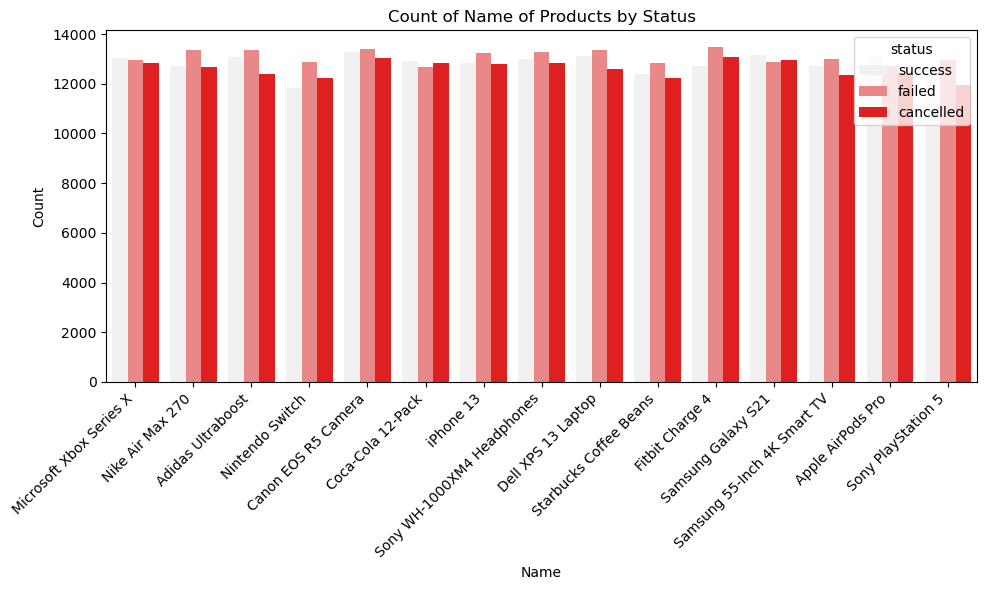

In [32]:
filtered_data = final_data.groupby(['name', 'status'])['status'].agg('count')

count2= final_data['name'].value_counts().sort_values(ascending= False).head(5)
label = final_data['name'].value_counts().sort_values(ascending= False).head(5).index


# Plot
plt.figure(figsize=(10, 6))
sns.countplot(x = final_data['name'], hue= final_data['status'], color='red')
plt.xlabel('Name')
plt.ylabel('Count')
plt.title('Count of Name of Products by Status')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


### The chart shows the rate of items successfully purchased, rejected and failed. This shows that while on the website, some customers can decide to cancel their order, successfully order the goods or the order failed

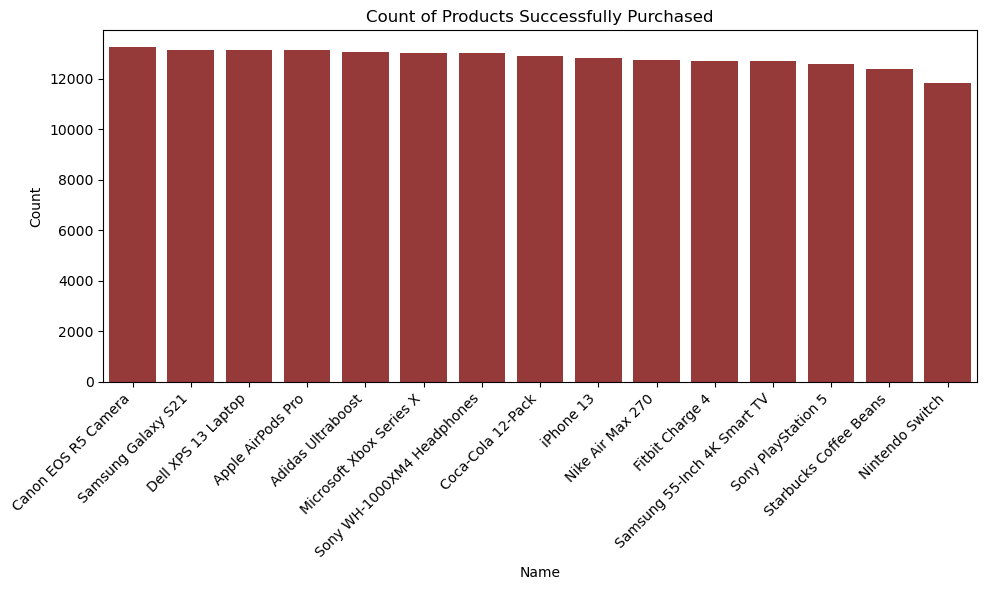

In [33]:
# Filter data to include only completed purchases

completed_purchases = final_data[final_data['status'] == 'success']

sorted_products = completed_purchases['name'].value_counts().sort_values(ascending=False).index


plt.figure(figsize=(10, 6))
sns.countplot(x = completed_purchases['name'], color='brown', order= sorted_products)
plt.xlabel('Name')
plt.ylabel('Count')
plt.title('Count of Products Successfully Purchased')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


#### The Canon EOS R5 Camera is the product with the most successfully purchase rate. The chart shows the top 20 successfully purchased products.

## How might these insights inform marketing strategies or personalized recommendations for this customer?

Product Recommendations: Analyzing the customer's purchase history allows businesses to understand their preferences and interests. By recommending similar products or complementary items based on past purchases, businesses can encourage repeat purchases and enhance customer satisfaction. 

Promotional Targeting: Identifying the customer's favorite products or product categories enables businesses to target them with relevant promotions and discounts. Offering personalized promotions tailored to the customer's preferences increases the likelihood of conversion and encourages loyalty.

Cross-Selling Opportunities: Analyzing the items frequently purchased together by the customer provides insights into cross-selling opportunities. Businesses can suggest related products or bundles to increase the average order value and maximize sales opportunities.

Retention Strategies: Understanding the customer's purchase frequency and buying behavior helps businesses develop effective retention strategies. By engaging the customer with personalized communications, loyalty rewards, or exclusive offers, businesses can foster long-term relationships and reduce churn.

Segmentation and Targeting: Segmenting customers based on their purchase history allows businesses to target them with relevant marketing messages and offers. By grouping customers with similar buying patterns or preferences, businesses can tailor their marketing efforts and optimize campaign performance.

Seasonal Campaigns: Analyzing the customer's past purchase timing and seasonal preferences enables businesses to anticipate their future needs and preferences. By launching seasonal campaigns or promotions aligned with the customer's purchase behavior, businesses can capitalize on seasonal trends and increase sales.

Feedback and Reviews: Encouraging customers to provide feedback or reviews on past purchases can further inform marketing strategies and product recommendations. Positive reviews can be leveraged in marketing campaigns to build trust and credibility, while constructive feedback can help businesses improve their offerings and customer experience.
Overall, leveraging insights from the customer's purchase history allows businesses to deliver more relevant and personalized marketing experie


In [67]:
event_type = final_data['event_type'].value_counts()

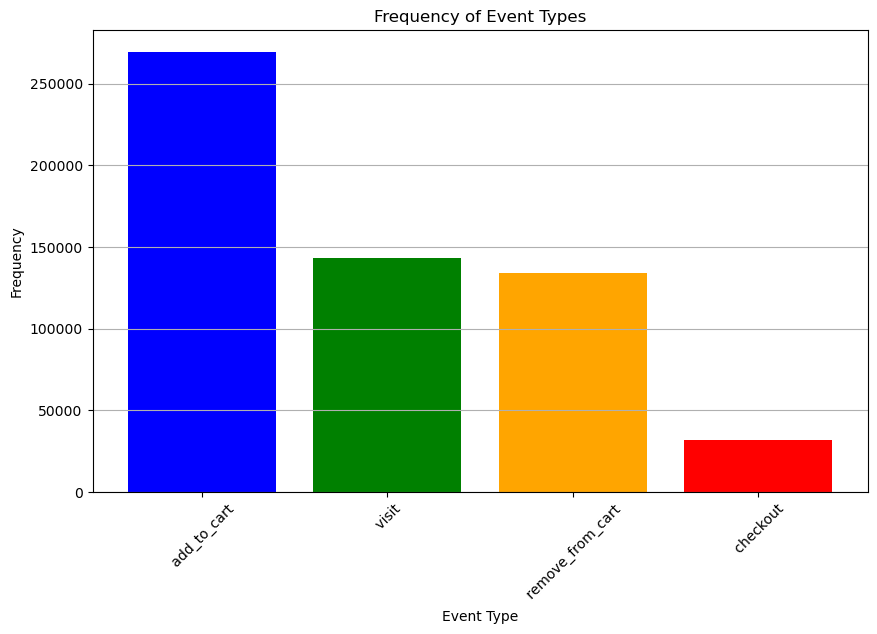

In [68]:
plt.figure(figsize=(10, 6))
plt.bar(event_type.index, event_type.values, color=['blue', 'green', 'orange', 'red'])
plt.title('Frequency of Event Types')
plt.xlabel('Event Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


Relative Frequency of Events:

The "visit" event is the most frequent, with 143,154 occurrences.
The "add_to_cart" event is the next most frequent, with 269,335 occurrences.
The "remove_from_cart" event occurs 134,090 times.
The "checkout" event is the least frequent, occurring 31,741 times.

User Interaction Flow:
The high number of "visit" events indicates a significant amount of traffic or user sessions on the website.
The "add_to_cart" event occurring more frequently than "remove_from_cart" and "checkout" suggests that users are more likely to add items to their carts than to proceed with the checkout process immediately.

Checkout Abandonment Rate :
The relatively low number of "checkout" events compared to "add_to_cart" events suggests a potential checkout abandonment issue. This could indicate that users are encountering friction or barriers during the checkout process, leading them to abandon their carts before completing the purchase.

Potential Optimization Opportunities:
Given the high frequency of "visit" events, optimizing the website to encourage more conversions from visits to "add_to_cart" events could help increase sales.
Analyzing the checkout process to identify and address any pain points or obstacles that may be causing users to abandon their carts could help improve conversion rates.

User Engagement:
The distribution of event types provides insights into user engagement levels and preferences. Understanding how users interact with the website can help tailor marketing strategies, user experiences, and product offerings to better meet their needs and preferences.